In [20]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
train_df = pd.read_csv('features.dat', header=None)
label_df = pd.read_csv('labels.dat', header=None)

In [11]:
param_grid = {
    'min_child_weight':np.arange(1,6,1),
    'max_depth': np.arange(3,10,1)
        }
estimator = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    seed=2018,
    scale_pos_weight=1
)
grid_s = GridSearchCV(estimator=estimator, param_grid=param_grid, verbose=1, n_jobs=-1, scoring='roc_auc', cv=5)
grid_s.fit(train_df, label_df.values.ravel())
print(grid_s.grid_scores_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 26.7min finished


[mean: 0.99377, std: 0.00493, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.99390, std: 0.00476, params: {'max_depth': 3, 'min_child_weight': 2}, mean: 0.99365, std: 0.00498, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.99379, std: 0.00486, params: {'max_depth': 3, 'min_child_weight': 4}, mean: 0.99375, std: 0.00488, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.99379, std: 0.00484, params: {'max_depth': 4, 'min_child_weight': 1}, mean: 0.99367, std: 0.00489, params: {'max_depth': 4, 'min_child_weight': 2}, mean: 0.99365, std: 0.00494, params: {'max_depth': 4, 'min_child_weight': 3}, mean: 0.99369, std: 0.00486, params: {'max_depth': 4, 'min_child_weight': 4}, mean: 0.99372, std: 0.00485, params: {'max_depth': 4, 'min_child_weight': 5}, mean: 0.99376, std: 0.00492, params: {'max_depth': 5, 'min_child_weight': 1}, mean: 0.99368, std: 0.00503, params: {'max_depth': 5, 'min_child_weight': 2}, mean: 0.99345, std: 0.00515, params: {'max_depth': 5, 'min_chil

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [5]:
def grid_scores_to_df(grid_scores):
    """
    Convert a sklearn.grid_search.GridSearchCV.grid_scores_ attribute to a tidy
    pandas DataFrame where each row is a hyperparameter-fold combinatination.
    """
    rows = list()
    for grid_score in grid_scores:
        for fold, score in enumerate(grid_score.cv_validation_scores):
            row = grid_score.parameters.copy()
            row['fold'] = fold
            row['score'] = score
            rows.append(row)
    df = pd.DataFrame(rows)
    return df

In [31]:
df=grid_scores_to_df(grid_s.grid_scores_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
fold                175 non-null int64
max_depth           175 non-null int64
min_child_weight    175 non-null int64
score               175 non-null float64
dtypes: float64(1), int64(3)
memory usage: 5.5 KB


In [32]:
df.head()

,fold,max_depth,min_child_weight,score
0,0,3,1,0.999617
1,1,3,1,0.986774
2,2,3,1,0.992330
3,3,3,1,0.999127
4,4,3,1,0.990980


In [24]:
df.to_csv('grid_scores_.csv',index=False)

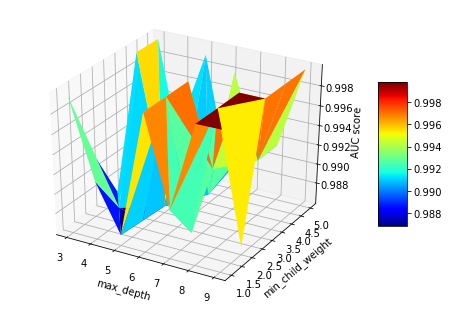

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(df.max_depth, df.min_child_weight, df.score, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('max_depth')
ax.set_ylabel('min_child_weight')
ax.set_zlabel('AUC score')
# plt.savefig('teste.pdf')
plt.show()

In [12]:
grid_s.best_params_

{'max_depth': 8, 'min_child_weight': 3}

In [35]:
grid_s.best_score_

0.9940189640202353